In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# read python dict back from the file

data_file = open('../data/SPK20220308/neuron_num_results/num_neuron_results.pkl', 'rb')
num_neuron_dict = pickle.load(data_file)
data_file.close()

In [4]:
num_repeats = 5
num_neuron_list = num_neuron_dict['num_neuron_list']

task_res = list()
notask_res = list()
for repeat_idx in range(num_repeats):
    task_test_corr = list()
    notask_test_corr = list()
    for num_neurons in num_neuron_list:
        res_dict = num_neuron_dict[f'repeat_{repeat_idx}'][f'num_neuron_{num_neurons}']
        task_test_corr.append(np.stack(res_dict['rnn']['task']['test_corr']))
        notask_test_corr.append(np.stack(res_dict['rnn']['notask']['test_corr']))

    task_res.append(np.stack(task_test_corr))
    notask_res.append(np.stack(notask_test_corr))

task_res = np.stack(task_res)
notask_res = np.stack(notask_res)


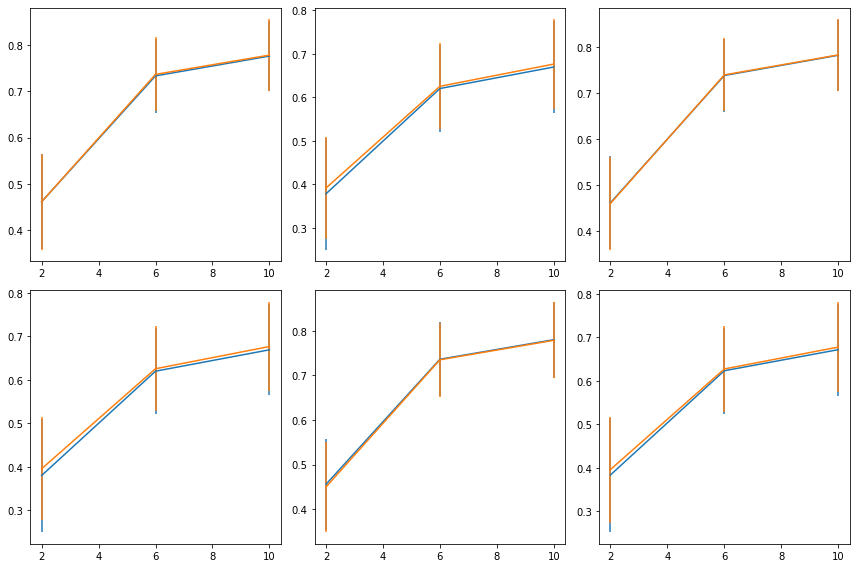

In [5]:
task_mean = np.mean(task_res, axis=0)
task_std = np.std(task_res,  axis=0)

notask_mean = np.mean(notask_res, axis=0)
notask_std = np.std(notask_res,  axis=0)

plt.figure(figsize=(12, 8))
for plot_idx in range(6):
    plt.subplot(2,3,plot_idx+1)
    plt.errorbar(x=num_neuron_list, y=notask_mean[:,plot_idx], yerr=notask_std[:,plot_idx])
    plt.errorbar(x=num_neuron_list, y=task_mean[:,plot_idx], yerr=task_std[:,plot_idx])
    # for repeat_idx in range(num_repeats):

    #     corr_diff = task_res[repeat_idx, :, plot_idx] - notask_res[repeat_idx, :, plot_idx]
    #     plt.plot(corr_diff)


    plt.tight_layout()

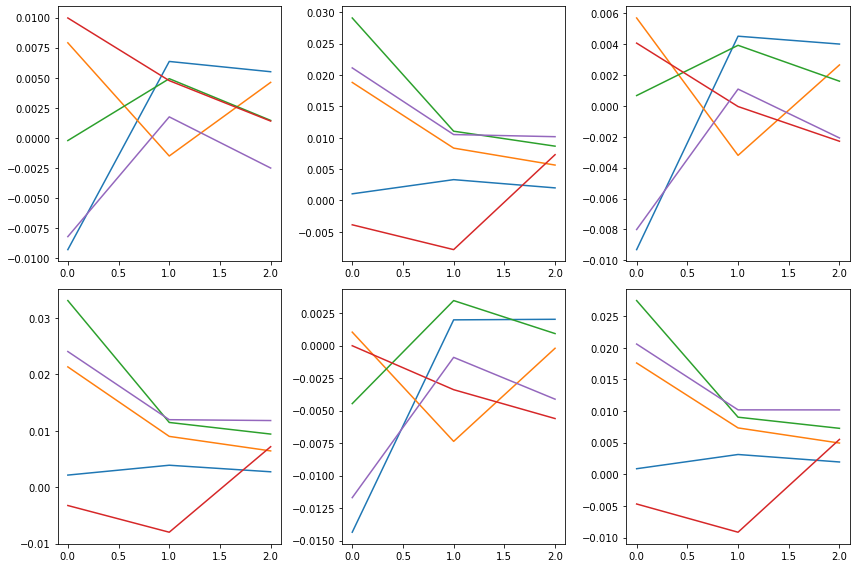

In [6]:
task_mean = np.mean(task_res, axis=0)
task_std = np.std(task_res,  axis=0)

notask_mean = np.mean(notask_res, axis=0)
notask_std = np.std(notask_res,  axis=0)

plt.figure(figsize=(12, 8))
for plot_idx in range(6):
    plt.subplot(2,3,plot_idx+1)
    # plt.errorbar(x=num_neuron_list, y=notask_mean[:,plot_idx], yerr=notask_std[:,plot_idx])
    # plt.errorbar(x=num_neuron_list, y=task_mean[:,plot_idx], yerr=task_std[:,plot_idx])
    for repeat_idx in range(num_repeats):

        corr_diff = task_res[repeat_idx, :, plot_idx] - notask_res[repeat_idx, :, plot_idx]
        # plt.plot(task_res[repeat_idx, :, plot_idx], color=f'C{repeat_idx}')
        # plt.plot(notask_res[repeat_idx, :, plot_idx], color=f'C{repeat_idx}')
        plt.plot(corr_diff)


    plt.tight_layout()

In [12]:
task_mean = np.mean(task_res, axis=0)


In [ ]:
ta